## Unit 5 - Financial Planning

In [1]:
 # Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\clear\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
 # Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [3]:
# Set monthly household income
monthly_income = 12000

### Collect Crypto Prices Using the requests Library

In [4]:
 # Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
 # Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
requests.get(btc_url)
btc_url_data = requests.get(btc_url)
btc_data = btc_url_data.json()

requests.get(eth_url)
eth_url_data = requests.get(eth_url)
eth_data = eth_url_data.json()

# Fetch current BTC price
current = float(btc_data['data']['1']['quotes']['USD']['price'])

# Fetch current ETH price
current2 = float(eth_data['data']['1027']['quotes']['USD']['price'])

# Compute current value of my crpto
my_btc_value = my_btc * current
my_eth_value = my_eth * current2

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15481.67
The current value of your 5.3 ETH is $2184.92


### Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [7]:
 # Current amount of shares
my_agg = 200
my_spy = 50

In [8]:
 # Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [9]:
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

start_date = pd.Timestamp("2020-10-21", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-10-21", tz="America/New_York").isoformat()
today_now = pd.Timestamp.today().isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Get current closing prices for SPY and AGG
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_ticker.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2020-10-21 00:00:00-04:00  117.59  117.64  117.48  117.515  2829309  343.33   

                                                             
                             high     low   close    volume  
time                                                         
2020-10-21 00:00:00-04:00  345.67  342.45  342.69  43419032

In [10]:
# Create and empty DataFrame for closing prices
closing_prices = pd.DataFrame()

# Pick AGG and SPY close prices
closing_prices["AGG"] = df_ticker["AGG"]["close"]
closing_prices["SPY"] = df_ticker["SPY"]["close"]

closing_prices
# Drop the time component of the date
closing_prices.index = closing_prices.index.date
closing_prices.head()

agg_close_price = closing_prices['AGG'][0]
spy_close_price = closing_prices['SPY'][0]

print(f"Current AGG closing price: ${agg_close_price:0.2f}")
print(f"Current SPY closing price: ${spy_close_price:0.2f}")

Current AGG closing price: $117.52
Current SPY closing price: $342.69


In [11]:
 # Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17134.50
The current value of your 200 AGG shares is $23503.00


#### Savings Health Analysis

In [12]:
# Create savings DataFrame
shares = my_spy_value + my_agg_value
crypto = my_btc_value + my_eth_value

savings = [['shares',shares],['crypto', crypto]]

df_savings = pd.DataFrame(savings, columns =['','amount'])
df_savings.set_index(df_savings[''], inplace=True)

# Use the `drop` function to drop specific columns
df_savings.drop(columns=[''], inplace=True)
df_savings

,amount
,
shares,40637.500
crypto,17666.593


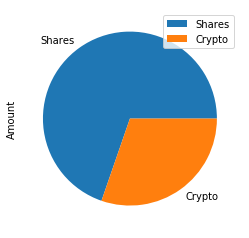

In [13]:
df_savings = pd.DataFrame({"Amount": [shares, crypto]},
                  index=['Shares', 'Crypto'])
plot = df_savings.plot.pie(subplots=True)

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
my_savings = shares + crypto

# Validate saving health
if my_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
else:
    print("Your need more funds")

Congratulations! You have enough money in your emergency fund.


#### Part 2 - Retirement Planning
Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date1 = pd.Timestamp('2015-10-21', tz='America/New_York').isoformat()
end_date1 = pd.Timestamp('2020-10-21', tz='America/New_York').isoformat()

In [16]:
 # Get 5 years' worth of historical data for SPY and AGG!
# Set the tickers
ticker = ["AGG", "SPY"]
    
df_stock_data = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date1,
    end=end_date1
).df

# Display sample data
df_stock_data.head().append(df_stock_data.tail())

AGG                                         SPY  \
                             open      high     low    close   volume    open   
time                                                                            
2015-10-21 00:00:00-04:00  109.73  109.9500  109.73  109.890  1119723  203.61   
2015-10-22 00:00:00-04:00  109.90  110.0500  109.83  109.940  1817244  202.98   
2015-10-23 00:00:00-04:00  109.79  109.7900  109.69  109.740  1344632  207.25   
2015-10-26 00:00:00-04:00  109.85  109.9000  109.74  109.790  1385981  207.30   
2015-10-27 00:00:00-04:00  110.03  110.0300  109.88  109.950  1791888  206.20   
2020-10-15 00:00:00-04:00  118.15  118.1500  117.96  117.970  4977703  343.71   
2020-10-16 00:00:00-04:00  117.99  118.0778  117.88  117.880  3591541  348.96   
2020-10-19 00:00:00-04:00  117.81  117.8700  117.72  117.787  4231106  348.62   
2020-10-20 00:00:00-04:00  117.70  117.7100  117.58  117.640  3624855  343.46   
2020-10-21 00:00:00-04:00  117.59  117.6400  117.48  117.515  2829309  343.33   

                                                              
                             high     low   close     volume  
time                                                          
2015-10-21 00:00:00-04:00  203.79  201.65  201.82   83704739  
2015-10-22 00:00:00-04:00  205.51  202.81  205.22  121670959  
2015-10-23 00:00:00-04:00  207.95  206.30  207.51  103135843  
2015-10-26 00:00:00-04:00  207.37  206.56  206.97   51484043  
2015-10-27 00:00:00-04:00  207.00  205.79  206.58   62899344  
2020-10-15 00:00:00-04:00  348.02  343.13  347.51   50609035  
2020-10-16 00:00:00-04:00  350.75  347.10  347.25   62796942  
2020-10-19 00:00:00-04:00  349.33  341.04  342.02   54462156  
2020-10-20 00:00:00-04:00  346.88  342.64  343.34   48206853  
2020-10-21 00:00:00-04:00  345.67  342.45  342.69   43419032

In [17]:
# ?MCSimulation

In [18]:
 # Configuring a Monte Carlo simulation to forecast 30 years cumulative returnss
MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [19]:
MC_30year.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
time                                                                 
2015-10-21 00:00:00-04:00  109.73  109.95  109.73  109.89  1119723   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-10-21 00:00:00-04:00          NaN  203.61  203.79  201.65  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.81  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   

                                                   
                              volume daily_return  
time                                               
2015-10-21 00:00:00-04:00   83704739          NaN  
2015-10-22 00:00:00-04:00  121670959     0.016847  
2015-10-23 00:00:00-04:00  103135843     0.011159  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884

In [20]:
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004120,1.000414,1.002031,1.004517,0.997928,1.008557,1.000809,0.996058,1.008909,0.999692,...,1.004345,1.006542,0.997856,0.999823,0.997697,0.999239,0.985377,1.005398,1.009794,1.001553
2,1.003932,1.001241,0.997279,1.004780,1.013074,1.001238,0.999936,0.999900,1.010628,0.991295,...,1.003269,1.020060,0.992645,1.004233,1.009217,1.004485,0.982553,1.009309,0.993514,0.994182
3,1.001712,0.995427,0.984675,1.012987,1.022729,1.019535,0.982557,0.989375,1.009833,0.993342,...,1.019677,1.025274,0.991767,0.999987,1.012151,1.003339,0.971691,1.008982,0.995952,0.989667
4,1.005176,0.994177,0.984793,1.020101,1.031111,1.013450,0.980607,0.990600,1.014176,0.978671,...,1.041462,1.022002,0.994516,0.998330,1.012340,0.996513,0.969711,1.009599,0.982586,0.985890
5,1.016019,1.000364,0.977565,1.024106,1.036665,1.009082,0.977591,0.990714,1.006702,0.964909,...,1.034951,1.011405,0.994594,1.003044,0.997241,1.003564,0.966576,1.015487,0.985288,0.983303
6,1.028234,1.015325,0.979507,1.025434,1.034461,1.018509,0.991198,0.984842,1.006610,0.962530,...,1.024465,1.031875,1.004910,1.002166,1.000149,1.014671,0.974726,1.007331,0.983996,0.979260
7,1.020107,1.014425,0.971820,1.011254,1.027810,1.018093,0.988679,0.981800,0.993442,0.971519,...,1.019317,1.029362,1.006135,1.016124,0.997887,1.006033,0.971188,1.010833,0.975265,0.977788
8,1.038309,1.007741,0.963216,1.020318,1.026326,1.022736,0.991501,0.984533,0.987505,0.975834,...,1.025871,1.037851,1.015874,1.016950,1.011149,1.007466,0.970787,1.016008,0.976075,0.965074
9,1.047519,1.006281,0.980774,1.027823,1.019831,1.032107,0.999008,0.981163,0.984210,0.970598,...,1.026960,1.035734,1.025389,1.018307,1.018682,1.004162,0.960711,1.015176,0.971781,0.968301


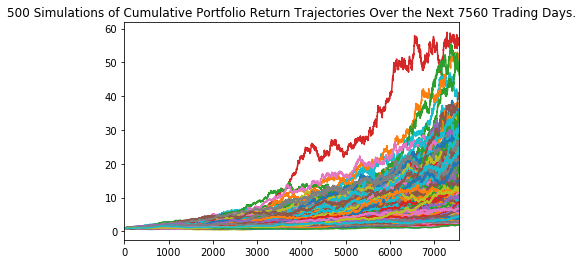

In [21]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_30year_sim_plot.png", bbox_inches="tight")

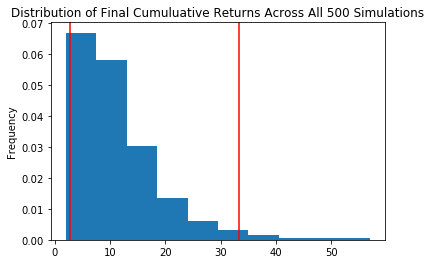

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_30year_dist_plot.png',bbox_inches='tight')

In [23]:
 # Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             11.481624
std               7.918658
min               1.957748
25%               6.136558
50%               9.439543
75%              14.427785
max              57.051844
95% CI Lower      2.706453
95% CI Upper     33.227784
Name: 7560, dtype: float64


#### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [24]:
 # Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $54129.05 and $664555.69


#### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals

In [25]:
# Set initial investment
initial_investment1 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower1 = round(tbl[8]*(20000*1.5),2)
ci_upper1 = round(tbl[9]*(20000*1.5),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment1} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower1} and ${ci_upper1}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $81193.58 and $996833.53


#### Optional Challenge - Early Retirement
Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
start_date5 = pd.Timestamp('2015-10-21', tz='America/New_York').isoformat()
end_date5 = pd.Timestamp('2020-10-21', tz='America/New_York').isoformat()
ticker5 = ["AGG", "SPY"]
    
five_stock_data = alpaca.get_barset(
    ticker5,
    timeframe,
    start=start_date5,
    end=end_date5
).df

# Display sample data
MC_fiveyear = MCSimulation(
    portfolio_data = five_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991490,0.994637,1.013289,1.009489,1.016588,1.023552,1.004943,1.002961,0.998208,0.996461,...,0.991972,0.997949,1.001061,0.998841,1.015761,1.012026,1.001200,0.995768,1.010791,1.001976
2,0.994185,0.988152,1.001176,1.015017,1.023398,1.035916,1.016833,1.000468,0.990281,1.005094,...,0.990790,1.011390,1.010585,1.004455,1.020825,1.016847,1.002491,0.997417,1.013081,0.993355
3,0.984989,0.998116,1.000972,1.022311,1.020776,1.040880,1.013096,1.000624,0.990359,1.008265,...,0.996513,1.009773,1.013626,1.010385,1.019684,1.015009,0.996484,0.987308,1.010630,0.997008
4,0.996302,0.990026,1.001864,1.035195,1.010936,1.030471,1.022351,1.007277,0.988370,1.001417,...,0.991728,1.003537,1.012279,1.015525,1.025263,1.020204,1.003585,0.982937,1.013954,0.996737
5,1.009891,0.989761,0.989292,1.049532,1.008953,1.029193,1.023590,1.003069,0.980154,0.991962,...,0.998589,1.002849,1.008170,1.018737,1.031162,1.021421,0.986692,0.993024,1.016376,1.006509
6,1.004641,0.985084,0.990639,1.051684,1.006001,1.051224,1.013223,1.006788,0.974278,0.990532,...,0.994203,0.993074,1.008940,1.015887,1.037075,1.012278,0.984665,0.990868,1.003825,0.993964
7,1.003661,0.973881,0.974351,1.056332,1.008068,1.039152,1.016794,1.015634,0.962390,0.987492,...,0.995241,0.993857,1.007958,1.004762,1.044597,1.020153,0.973966,0.995599,1.009439,0.992161
8,0.996217,0.979610,0.974405,1.058587,1.004684,1.044189,1.019983,1.018420,0.962371,0.993665,...,0.990163,1.001013,1.019146,1.009600,1.060413,1.013018,0.968065,0.997605,1.013980,1.000279
9,0.982247,0.976020,0.967552,1.061535,1.002011,1.047510,1.041058,1.025530,0.953493,0.992703,...,0.982334,0.993697,1.027505,1.007456,1.055544,1.013377,0.960758,0.986074,1.003982,0.985971


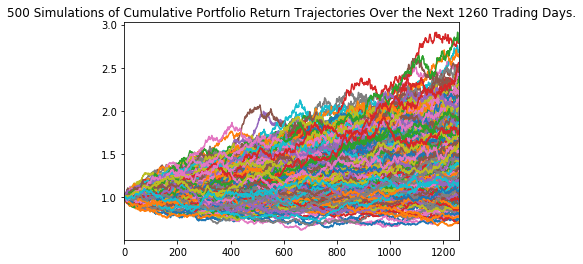

In [28]:
 # Plot simulation outcomes
line_plot_5 = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot_5.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

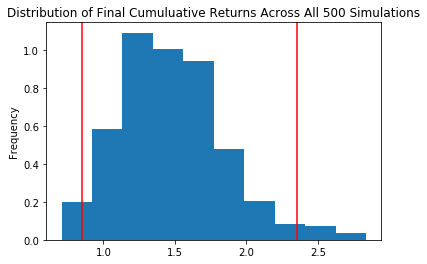

In [29]:
# Plot probability distribution and confidence intervals
dist_plot_5 = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot_5.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.479275
std               0.369557
min               0.706843
25%               1.208484
50%               1.440859
75%               1.689786
max               2.836506
95% CI Lower      0.852847
95% CI Upper      2.356266
Name: 1260, dtype: float64


In [41]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*60000,2)
ci_upper_five = round(tbl_five[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $51170.83 and $141375.94


 ##### Ten Years Retirement Option

In [32]:
 # Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

start_date_10 = pd.Timestamp('2015-10-21', tz='America/New_York').isoformat()
end_date_10 = pd.Timestamp('2020-10-21', tz='America/New_York').isoformat()
ticker_10 = ["AGG", "SPY"]
    
ten_stock_data = alpaca.get_barset(
    ticker_10,
    timeframe,
    start=start_date_10,
    end=end_date_10
).df

# Display sample data
MC_tenyear = MCSimulation(
    portfolio_data = ten_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [33]:
 # Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991594,1.002037,1.015783,0.992909,0.999869,1.003020,0.996160,0.997592,1.003580,1.005992,...,1.009475,1.009886,1.011960,1.003002,1.004620,0.993947,0.997356,0.990442,1.003680,1.003087
2,1.007627,1.005011,1.022004,0.995014,0.993867,1.006717,0.997529,1.006545,1.007626,1.010149,...,1.015509,1.009517,1.019536,1.000913,1.008977,0.989017,1.006861,1.001856,1.009923,1.016719
3,1.012336,1.008078,1.015817,0.995386,0.994354,1.009402,0.997968,1.008520,1.010300,1.018390,...,1.007818,1.006145,1.031983,1.013813,1.003939,0.996472,1.003897,1.011214,1.018431,1.031396
4,1.006332,1.011255,1.009246,1.005746,1.006934,1.009611,0.992128,1.022492,1.019176,1.015143,...,0.995410,0.992381,1.043072,1.004627,1.004142,0.999641,1.013634,1.014012,1.018407,1.029671
5,1.011250,1.009269,1.000046,0.995360,1.016537,1.007230,0.999098,1.018136,1.015429,1.015001,...,1.004724,0.984866,1.041876,1.015209,1.008943,0.990684,1.012640,1.026449,1.030104,1.024496
6,1.007877,1.014489,0.992191,0.990460,1.025530,1.009027,0.997963,1.032800,1.031655,1.013515,...,1.004609,0.981490,1.039404,1.035888,1.020174,0.993030,1.010143,1.038355,1.030429,1.019270
7,0.998128,1.013309,0.993694,0.994710,1.033257,0.995153,1.008941,1.032138,1.039748,1.000577,...,1.008120,0.980833,1.040072,1.030754,1.026605,0.986996,1.015619,1.030925,1.047603,1.020059
8,0.995135,1.008884,0.988559,1.008613,1.028055,1.002922,1.011900,1.031409,1.032740,1.005435,...,0.993922,0.974735,1.054269,1.037482,1.025273,0.997146,1.020557,1.036415,1.055340,1.015388
9,1.006882,1.008489,0.980998,1.018442,1.027934,1.018829,1.005493,1.036120,1.034274,1.008667,...,0.990928,0.979091,1.049087,1.038074,1.015005,0.997297,1.027269,1.040012,1.059217,1.001088


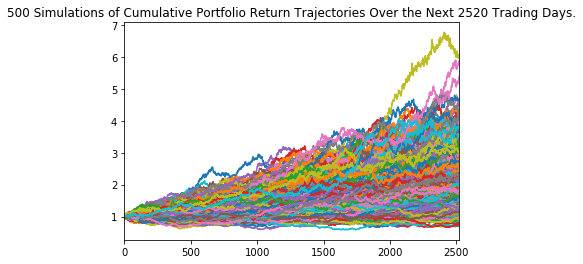

In [34]:
 # Plot simulation outcomes
line_plot_10= MC_tenyear.plot_simulation()

# Save the plot for future usage
line_plot_10.get_figure().savefig("MC_tenyear_sim_plot.png", bbox_inches="tight")

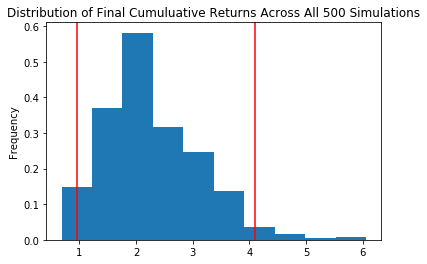

In [35]:
# Plot probability distribution and confidence intervals
dist_plot_10 = MC_tenyear.plot_distribution()

# Save the plot for future usage
dist_plot_10.get_figure().savefig('MC_tenyear_dist_plot.png',bbox_inches='tight')

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.277401
std               0.826840
min               0.687398
25%               1.729742
50%               2.131568
75%               2.762372
max               6.054146
95% CI Lower      0.967116
95% CI Upper      4.100817
Name: 2520, dtype: float64


In [42]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*60000,2)
ci_upper_ten = round(tbl_ten[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $58026.98 and $246049.04
